# 결정트리

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

* 엔트로피(Entropy)
    * $ entropy = \Sigma -p_{i}\log_{2}p_{i} $
    * leaf node의 불순도를 측정하는 지표
    * 소수 클래스의 변화에 더 큰 가중치를 부여한다. $-p\log_{2}p$ 그래프에서 0.3 좌단의 기울기 변화가 훨씬 크다.
* 정보이득
    * 부모노드에서 자식노드로 분기했을 때 엔트로피 증감의 평균(기대값)
    * $정보이득 = 부모노드 엔트로피 - \Sigma(특정자식노드의 관측값 수/전체 자식노드의 관측값 수 * 특정 자식노드의 엔트로피) $
* 지니불순도
    * $ \Sigma(1-p_{i}^2) $
    * 엔트로피와 같은 의미. 간단하게 계산할 수 있다.


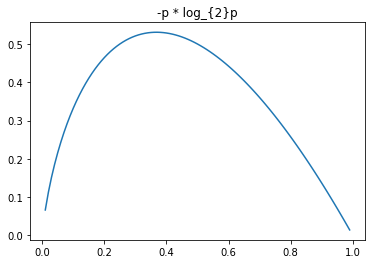

In [8]:
# entropy graph
p = np.arange(0.01, 1, 0.01)
y = -p*np.log2(p)
plt.title('-p * log_{2}p')
plt.plot(p, y)
plt.show()

## HR 퇴직률 데이터
* 직원이 떠날것인지 남을것인지 예측

In [13]:
root = 'C:/Users/wonca/Documents/git_repositories/TIL/2_머신러닝이론/4_tree_based_models/data/'
file_name = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
hr_df = pd.read_csv(root + file_name)
print(hr_df.shape)
hr_df.head(2)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [15]:
# ylabel
y = hr_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
hr_df['y'] = y

In [52]:
# 더미변수 생성
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
dummy_cols = []
for cat_col in categorical_cols:
    dummy_col = pd.get_dummies(hr_df[cat_col], prefix=cat_col)
    dummy_cols.append(dummy_col)
dummy_cols[0].head(2)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0


In [44]:
# 연속형 변수
origianl_numeric_cols = hr_df.select_dtypes(include=np.int64).columns.tolist()
remove_cols = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
numeric_cols = [el for el in origianl_numeric_cols if el not in remove_cols]
numeric_df = hr_df[numeric_cols]

In [65]:
# 더미변수 + 연속형변수
hr_new_df = pd.concat(dummy_cols + [numeric_df] + [hr_df['y']], axis=1)
hr_new_df.head(2)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,0,0,1,0,0,1,0,1,0,0,...,1,0,8,0,1,6,4,0,5,1
1,0,1,0,0,1,0,0,1,0,0,...,4,1,10,3,3,10,7,1,7,0


In [66]:
# train test split
x = hr_new_df.drop(['y'], axis=1)
y = hr_new_df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.7, random_state=42)

In [70]:
# dt
# 분기기준: 지니불순도
# 최대깊이: 5
# 분할을 위한 최소관측값: 2개
# leaf node 최소관측값: 1개

dt_model = DecisionTreeClassifier(criterion='gini',
                                  max_depth=5, 
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [88]:
# insample 
y_insamp_pred = dt_model.predict(x_train)

# 혼동행렬
display(pd.crosstab(y_train.values, y_insamp_pred, rownames=['actual'], colnames=['predict']))

print(classification_report(y_train, y_insamp_pred))

predict,0,1
actual,,
0,361,4
1,26,50


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       365
           1       0.93      0.66      0.77        76

    accuracy                           0.93       441
   macro avg       0.93      0.82      0.86       441
weighted avg       0.93      0.93      0.93       441



In [89]:
# outsample 
y_outsamp_pred = dt_model.predict(x_test)

# 혼동행렬
display(pd.crosstab(y_test, y_outsamp_pred, rownames=['actual'], colnames=['predict']))

print(classification_report(y_test, y_outsamp_pred))

predict,0,1
actual,,
0,773,95
1,128,33


              precision    recall  f1-score   support

           0       0.86      0.89      0.87       868
           1       0.26      0.20      0.23       161

    accuracy                           0.78      1029
   macro avg       0.56      0.55      0.55      1029
weighted avg       0.76      0.78      0.77      1029

